<a href="https://colab.research.google.com/github/cpalme28/MAT-421/blob/main/Module_H2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 11 - Coree Palmer

**22.4 - Numerical Error and Instability**

The two main issues to consider with regard to integration schemes for ODEs are accuracy stability.
* accuracy: the scheme's ability to get close to the exact solution as a function of the step size h.
* stability: the ability to keep the error from growing as it integrates forward in time
  * If the error doesn't grow, then the scheme is stable; otherwise it is unstable.
  * If the scheme is stable for some choices of h and unstable for others, these integration schemes are referred to as unstable.

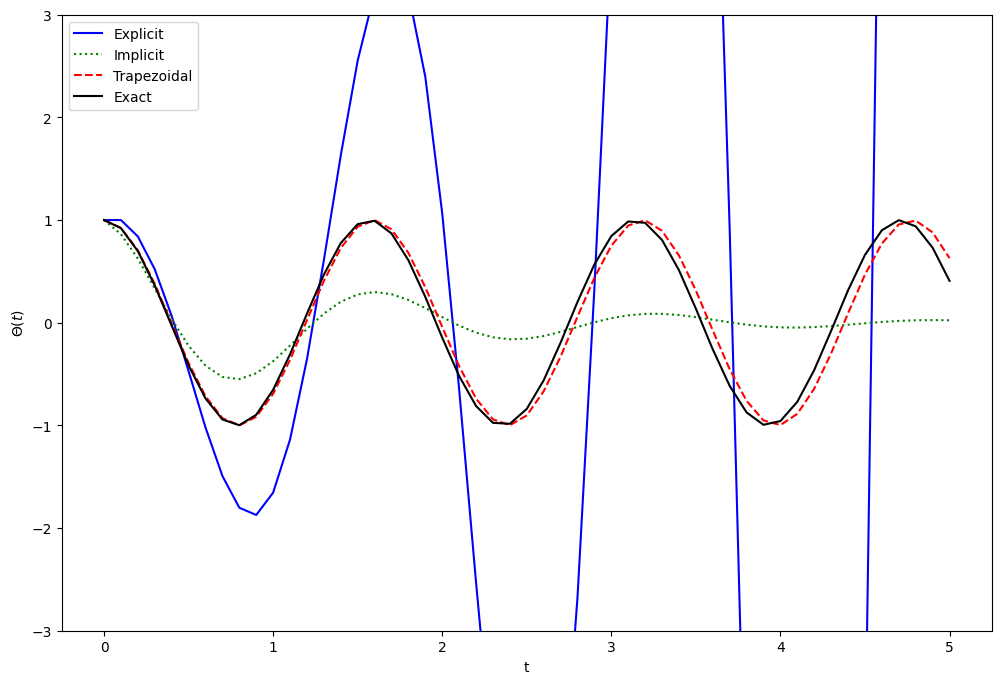

In [4]:
# use the euler explicit, euler implicit, and trapezoidal formulas to solve the pendulum equation over the time
# interval [0, 5] in increments of 0.1 and for an initial solution of S_0 = [[1],[0]]. Let sqrt(g/l) = 4

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

h = 0.1 # step size
t = np.arange(0, 5.1, h) # numerical grid
w = 4 # oscillation freq of pendulum
s0 = np.array([[1],[0]])
m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t) - 1):
  s_e[j+1, :] = np.dot(m_e, s_e[j, :])
  s_i[j+1, :] = np.dot(m_i, s_i[j, :])
  s_t[j+1, :] = np.dot(m_t, s_t[j, :])

plt.figure(figsize = (12,8))
plt.plot(t, s_e[:, 0], 'b-')
plt.plot(t, s_i[:, 0], 'g:')
plt.plot(t, s_t[:, 0], 'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.show()

The generated figure above shows the comparisons of numerical solution to the pendulum problem.
* The exact solution is a pure cosine wave.
* The Explicit Euler scheme is obviously unstable.
* The Implicit Euler scheme decays exponentially, which is not correct.
* The Trapezoidal method captures the solution correctly, with a small phase shift as time increase.

**22.5 - Predictor-Corrector and Runge Kutta Methods**

Predictor-Corrector Methods
* Predictor-Corrector moethods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the F function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state.
* Uses two formulas: the predictor and corrector.
  * The predictor is an explicit formula and firrst estimates the solution at $t_{j+1}$, which we can use the Euler method for.
  * After we obtain the solution $S(t_{j+1})$, we can apply the corrector to improve the accuracy. The corrector can calculate a new, more accurate solution.
* The midpoint method has a predictor step:
  * $S(t_j + h/2) = S(t_j) + h/2 F(t_j, S(t_j))$, which is the prediction of the solution value.
* It then computes the corrector step:
  * $S(t_{j+1}) = S(t_j) + hF(t_j + h/2, S(t_j + h/2)), which computes the solution at $S(t_{j+1})$ from $S(t_j)$ but using the derivative from $S(t_j + h/2)$.

Runge Kutta Methods
* They are one of the most widely used methods for solving ODEs.
* The extra work of deriving the expressions for $S''(t_j)$, $S'''(t_j)$, ..., $S^{(n)}(t_j)$ can be avoided using the RK methods, which is based on truncated Taylor series.
* Second order Runge Kutta method
  * Let dS(t)/dt = F(t, S(t)), then we can assume an integration formula in the form of $S(t+h) = S(t) + c_1 F(t, S(t)) + c_2 F[t+ph, S(t) + qhF(t, S(t))]h$.
  * After attempting to find the parameters of $c_1$, $c_2$, p, q, we can easily obtain the following:
    * $c_1 + c_2 = 1$
    * $c_2 p = 1/2$
    * $c_2 q = 1/2$
    * A populat choice is that $c_1 = c_2 = 1/2$ and $p = q = 1$.
* Fourth-order Runge Kutta method
  * A classical method for integrating ODEs with a high order of accuracy is the Fourth Order Runge Kutta (RK4) method. It is obtained from the Taylor series using similar approach we just discussed in the second-order method. This method uses four points $k_1$, $k_2$, $k_3$, and $k_4$. The formulas for them are as follows:
    * $k_1 = F(t_j, S(t_j))$
    * $k_2 = F(t_j + h/2, S(t_j) + 1/2 k_1 h)$
    * $k_3 = F(t_j + h/2, S(t_j) + 1/2 k_2 h)$
    * $k_4 = F(t_j + h, S(t_j) + k_3 h)$
  * We then get the following:
    * $S(t_{j+1}) = S(t_j) + h/6(k_1 + 2k_2 + 2k_3 + k_4)$

**22.6 - Python ODE Solvers**

In scipy, there are several built-in functions for solving initial value problems. The most common one used is the scipy.integrate.solve_ivp function.

Consider the below examples:

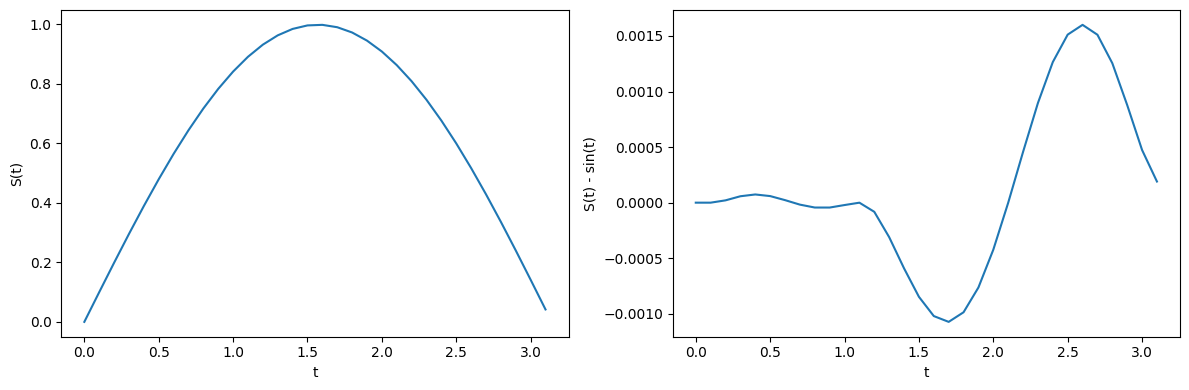

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The left figure shows the integration of dS(t)/dt = cos(t) with solve_ivp. The right figure computes the difference between the solution of the integration by solve_ivp and the evaluation of the analytical solution to this ODE.

As can be seen from the figure, the difference between the approximate and exact solution to this ODE is small. We can control the relative and absolute tolerances using the rtol and atol arguments, the solver keeps the local error estiamtes less than atol+rtol*abs(S). The default values are 1e-3 for rtol and 1e-6 for atol.

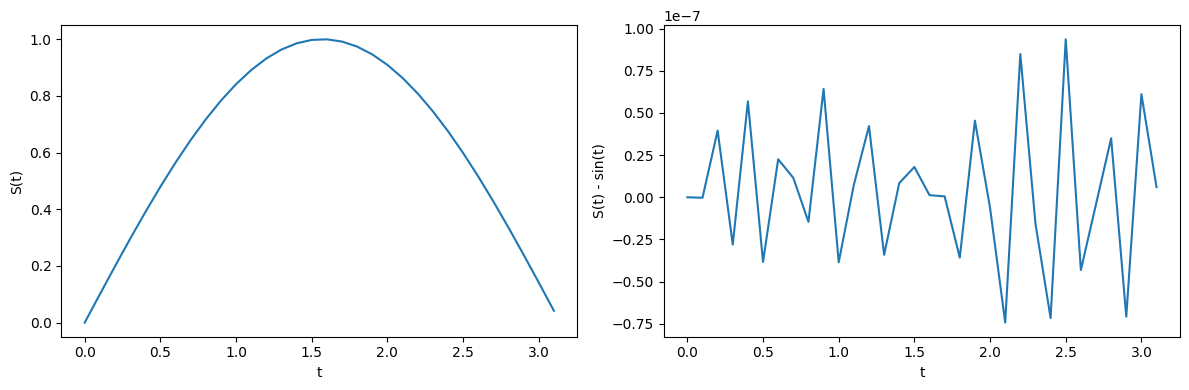

In [6]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Like the previous example, the difference between the result of solve_ivp and the evaluation of the analytical solution by Python is very small in comparison to the value of the function.